In [40]:
import os
cwd = os.getcwd()
cwd
os.chdir("C:/Users/днс/Desktop")

os.listdir('.')
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [41]:
df=pd.read_excel('test.xlsx', 0) 
df.sample(5) #выведет пять случайных строк таблицы

,название,тип,№,амплитуда,длительность,рр интервал,скорость нарастания,скорость спада,отношение скоростей
49,7910,NaN,50,1.2486,0.0560,1.0388,0.2679,0.4612,0.579897
45,5091,NaN,46,0.7632,0.0460,1.0059,0.2121,0.4209,0.511555
48,7879,NaN,49,0.3769,0.0500,0.9084,0.0964,0.1775,0.545973
14,b017,здоровый,15,1.0621,0.0430,0.8179,0.0146,0.0159,0.933551
35,cu07,NaN,36,1.5143,0.0768,1.3260,0.2564,0.2317,1.130364


In [42]:
df.info() # информация о столбцах таблицы и типах меременных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   название             51 non-null     object 
 1   тип                  20 non-null     object 
 2   №                    51 non-null     int64  
 3   амплитуда            51 non-null     float64
 4   длительность         51 non-null     float64
 5   рр интервал          51 non-null     float64
 6   скорость нарастания  51 non-null     float64
 7   скорость спада       51 non-null     float64
 8   отношение скоростей  51 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.7+ KB


In [43]:
df.describe() # статистики по столбцам с количественными переменными

,№,амплитуда,длительность,рр интервал,скорость нарастания,скорость спада,отношение скоростей
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,1.219418,0.066278,0.805540,0.153975,0.221725,0.817647
std,14.866069,0.672619,0.030156,0.188836,0.160976,0.247353,0.325869
min,1.000000,0.134500,0.036000,0.489100,0.005700,0.007600,0.411978
25%,13.500000,0.813250,0.048000,0.639200,0.014600,0.016900,0.620473
50%,26.000000,1.167100,0.057000,0.817900,0.107900,0.101100,0.799725
75%,38.500000,1.479300,0.073000,0.946050,0.234250,0.322900,0.904388
max,51.000000,3.884700,0.175000,1.326000,0.634400,0.941900,2.472539


In [44]:
df.columns #ниже выводит список столцов

Index(['название', 'тип', '№', 'амплитуда', 'длительность', 'рр интервал',
       'скорость нарастания', 'скорость спада', 'отношение скоростей'],
      dtype='object')

In [45]:
col=['амплитуда', 'длительность', 'рр интервал',
       'скорость нарастания', 'скорость спада', 'отношение скоростей']

In [46]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True) # заменяет пропуски данных нулями, в противном случае выдаст ошибку

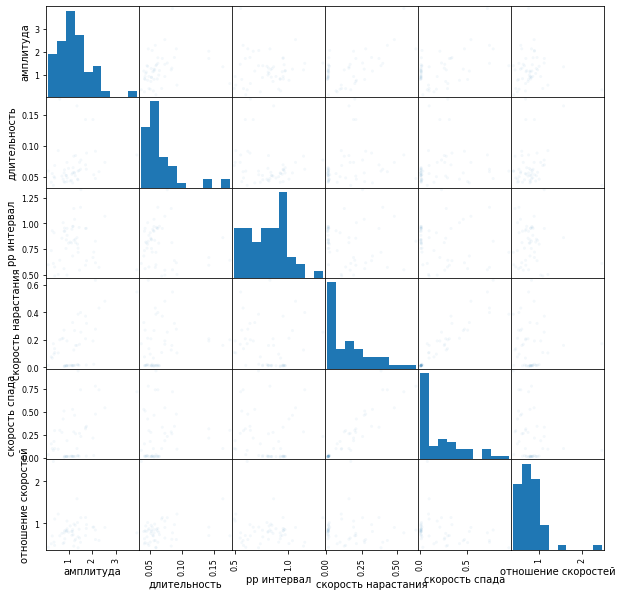

In [47]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));#кластеризация методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [48]:
df[col].corr() #парные корреляции

,амплитуда,длительность,рр интервал,скорость нарастания,скорость спада,отношение скоростей
амплитуда,1.000000,0.242894,0.015013,0.587480,0.490448,-0.027171
длительность,0.242894,1.000000,-0.181633,0.195656,0.110977,0.113478
рр интервал,0.015013,-0.181633,1.000000,-0.109707,-0.113412,-0.095952
скорость нарастания,0.587480,0.195656,-0.109707,1.000000,0.925390,-0.038265
скорость спада,0.490448,0.110977,-0.113412,0.925390,1.000000,-0.289615
отношение скоростей,-0.027171,0.113478,-0.095952,-0.038265,-0.289615,1.000000


In [49]:
#библиотека препроцесинга данных автоматически приведодит данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [50]:
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в специальной переменной (используется ниже для визуализации и выделения количества кластеров)
data_linkage = linkage(data_dist, method='average')

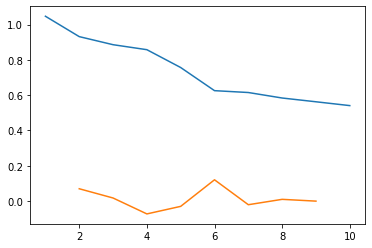

Рекомендованное количество кластеров: 6


In [51]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [52]:
nClust=2

In [53]:
#кластеризация методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [54]:
#полученное распределение по кластерам и номер кластера, (т.к. нумерация начинается с нуля, выводим добавляя 1)
km.labels_ +1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1])

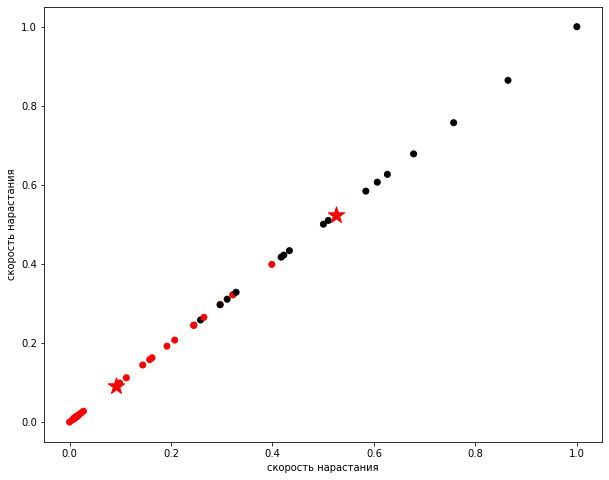

In [55]:
x=3 # Чтобы построить диаграмму в разных осях, изменить номера столбцов
y=3 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [103]:
# добавление номера кластеров к таблице
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,амплитуда,длительность,рр интервал,скорость нарастания,скорость спада,отношение скоростей,Количество
KMeans,,,,,,,
1,1.772400,0.081375,0.738880,0.343150,0.511406,0.725949,16
2,0.966626,0.059377,0.836013,0.067494,0.089300,0.859567,35


In [104]:
df[df['KMeans']==2] # меняется номер кластера для отображения данных в нем

,название,тип,№,амплитуда,длительность,рр интервал,скорость нарастания,скорость спада,отношение скоростей,KMeans
0,b001,здоровый,1,1.1671,0.0560,0.96880,0.0128,0.0152,0.844405,2
1,b002,здоровый,2,1.1857,0.0645,0.97060,0.0119,0.0166,0.723707,2
2,b003,здоровый,3,0.9916,0.0634,0.80716,0.0113,0.0146,0.784185,2
3,b004,здоровый,4,0.8059,0.0560,0.92250,0.0057,0.0076,0.766667,2
4,b005,здоровый,5,1.2761,0.0515,0.84500,0.0146,0.0156,0.948378,2
5,b006,здоровый,6,1.4401,0.0599,0.96000,0.0146,0.0171,0.854412,2
6,b008,здоровый,7,2.0598,0.0531,0.72060,0.0229,0.0254,0.905334,2
7,b009,здоровый,8,1.7434,0.0620,0.95100,0.0169,0.0194,0.873046,2
8,b010,здоровый,9,0.8206,0.0610,0.95280,0.0092,0.0114,0.816104,2
9,b012,здоровый,10,0.8835,0.0520,0.75560,0.0116,0.0143,0.830810,2


In [ ]:
# сохраним результаты в файл
#df.to_excel('result_claster.xlsx', index=False)